***Importing Necessary Library***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

***Load Dataset***

In [2]:
df1=pd.read_csv("loan.csv")

***Columns present in dataset***

In [3]:
#Id : Unique identifier for each loan record.
#Date_Of_Disbursement : The date when the loan was disbursed or recieved.
#Business : Indicates whether the business is new or existing.
#Low_Documentation_Loan : Indicates whether the loan was granted with minimal documentation (Yes/No).
#Jobs_Retained : Number of jobs retained dur to the loan.
#Jobs_Created : Number of jobs created due to the loan.
#Year_Of_Commitment : year when the loan commitment was made.
#Guaranteed_Approved_Loan : Amount of loan guaranteed and approved(in Rs.)
#Borrower_Name : Name of the borrower.
# Demography : Specifies the demographic classification (e.g., Urban, Rural, Undefined).
# State_Of_Bank : The state where the lending bank is located.
# ChargedOff_Amount : The amount of loan that was written off due to default.
#Borrower_City : City where the borrower is located.
# Borrower_State : The state where the borrower is located.
# Gross_Amount_Balance : The remaining balance of the loan.
# Count_Employees : The number of employees in the borrower's business.
#Classification_Code : Code representing business classification or type.
#Loan_Approved_Gross :Total gross amount approved for the loan(in Rs.).
#Gross_Amount_Disbursed : Total gross amount disbursed(in Rs.).
# Loan_Term : The duration of the loan in months.
# Commitment_Date : The date on which the loan was committed.
# Name_Of_Bank : The name of the bank that issued the loan.
# Revolving_Credit_Line : Indicates whether the loan is a revolving credit line (Yes/No).
#Primary_Loan_Digit : Primary identifier for categorizing loans.
#Code_Franchise : Code indicating if it's a franchise related business.
# Default : Indicates whether the borrower defaulted on the loan (1 for Default, 0 for No Default).

***Checking Rows and Columns***

In [4]:
df1.shape

(105000, 26)

***First 5 Rows***

In [5]:
df1.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


***Checking Data Types***

In [6]:
df1.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

***Removing extra spaces from column names***

In [7]:
df1.columns = df1.columns.str.strip()

***Removing Unnecessary columns***

In [8]:
#Id : Unique Identifier,not useful for predictio.
#Jobs_Retained : Very low correlation with loan default.
#Jobs_Created: Doesn't significantly impact default risk.
#Count_Employees : Employee count doesn't strongly affect default risk.
#Borrower_Name : just a name used to identify borrower.
#Borrower_city : This column has very high cardinality(many unique cities).
#Borrower_State : not useful for prediction.
#Gross_Amount_Balance : extremely skewed coulmn and having very high vif also have almost correlation with Default

In [9]:
df1=df1.drop(["ID","Jobs_Reatained","Count_Employees",'Jobs_Created',"Borrower_Name","Borrower_City","Borrower_State","Gross_Amount_Balance"],axis=1)

***Converting to numeric***

In [10]:
df1["Year_Of_Commitment"]=pd.to_numeric(df1["Year_Of_Commitment"],errors='coerce')

***Converting to datetime format***

In [11]:
df1["Commitment_Date"]=pd.to_datetime(df1["Commitment_Date"],errors='coerce')

In [12]:
df1["Date_Of_Disbursement"]=pd.to_datetime(df1["Date_Of_Disbursement"],errors='coerce')

***Making new column***

In [13]:
df1["Processing_Time_Days"]=(df1["Date_Of_Disbursement"]-df1["Commitment_Date"]).dt.days

***Removing old columns***

In [14]:
df1=df1.drop(["Date_Of_Disbursement","Year_Of_Commitment","Commitment_Date"],axis=1)

***Cleaning currency column***

In [15]:
def clean_currency_column(column):
    return (
        column.astype(str).str.replace(r"[^\d.]","",regex=True).str.replace(r"^\.","",regex=True).str.replace(r"\.$","",regex=True).astype(float))

In [16]:
df1["Loan_Approved_Gross"]=clean_currency_column(df1["Loan_Approved_Gross"])

In [17]:
df1["Gross_Amount_Disbursed"]=clean_currency_column(df1["Gross_Amount_Disbursed"])

In [18]:
df1["ChargedOff_Amount"]=clean_currency_column(df1["ChargedOff_Amount"])

In [19]:
df1["Guaranteed_Approved _Loan"]=clean_currency_column(df1["Guaranteed_Approved _Loan"])

***Numerical Columns***

In [20]:
numerical_cols=df1.select_dtypes(include=['number'])

In [21]:
numerical_cols.describe()

,Guaranteed_Approved _Loan,ChargedOff_Amount,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default,Processing_Time_Days
count,1.050000e+05,1.050000e+05,105000.000000,1.050000e+05,1.050000e+05,105000.000000,1.050000e+05,105000.000000,105000.000000,104765.000000
mean,1.151738e+07,1.711913e+06,405918.304276,1.492200e+07,1.563878e+07,156.438362,4.661622e+09,2707.201638,0.277181,107.207579
std,1.818916e+07,6.520106e+06,260335.963766,2.262852e+07,2.288627e+07,116.412721,2.546599e+09,12660.609090,0.447609,236.210157
min,4.064000e+04,0.000000e+00,0.000000,8.128000e+04,3.251200e+05,0.000000,1.000034e+09,0.000000,0.000000,-36404.000000
25%,1.625600e+06,0.000000e+00,236115.000000,2.600960e+06,3.251200e+06,90.000000,2.478163e+09,0.000000,0.000000,28.000000
50%,4.226560e+06,0.000000e+00,447110.000000,6.502400e+06,7.802880e+06,126.000000,4.119824e+09,1.000000,0.000000,55.000000
75%,1.316736e+07,6.170168e+05,561740.000000,1.690624e+07,1.812579e+07,180.000000,6.760484e+09,1.000000,1.000000,112.000000
max,3.657600e+08,1.625599e+08,928120.000000,4.064000e+08,7.311136e+08,692.000000,9.996003e+09,92006.000000,1.000000,4029.000000


***Categorical columns***

In [22]:
categorical_cols=df1.select_dtypes(include=['object','category'])

In [23]:
categorical_cols.describe(include='O')

,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Name_Of_Bank,Revolving_Credit_Line
count,104985,104633,105000,105000,105000,104509
unique,3,7,3,34,143,11
top,Existing,No,Urban,TR,ICICI Bank Ltd.,No
freq,75091,92135,57598,15552,11215,48122


***Checking for null values***

In [24]:
df1.isnull().sum()

Business                      15
Guaranteed_Approved _Loan      0
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
Processing_Time_Days         235
dtype: int64

***Handling null values***

***Dropping null values***

In [25]:
df1=df1.dropna(subset=['Processing_Time_Days','Business'])

***Filling Null values using  mode***

In [26]:
df1['Low_Documentation_Loan'].fillna(df1['Low_Documentation_Loan'].mode()[0],inplace=True)

In [27]:
df1['Revolving_Credit_Line'].fillna(df1['Revolving_Credit_Line'].mode()[0],inplace=True)

***Checking null values after filling***

In [28]:
df1.isnull().sum()

Business                     0
Guaranteed_Approved _Loan    0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Primary_Loan_Digit           0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Default                      0
Processing_Time_Days         0
dtype: int64

***Univariate Analysis***

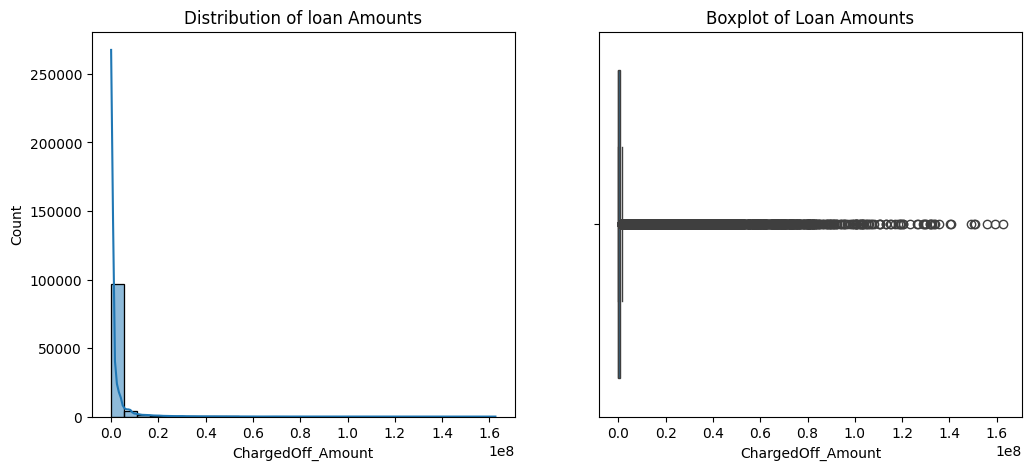

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df1['ChargedOff_Amount'],bins=30,kde=True)
plt.title("Distribution of loan Amounts")
plt.subplot(1,2,2)
sns.boxplot(x=df1["ChargedOff_Amount"])
plt.title("Boxplot of Loan Amounts")
plt.show()

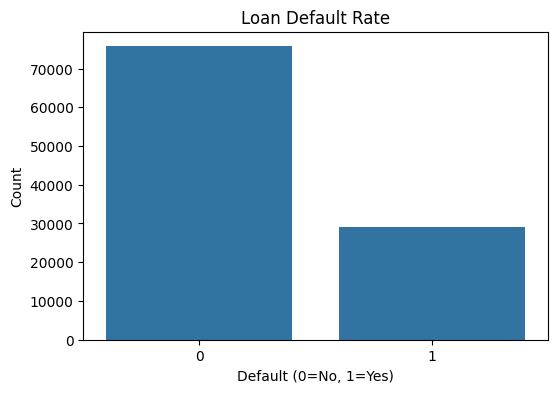

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x=df1["Default"])
plt.title("Loan Default Rate")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

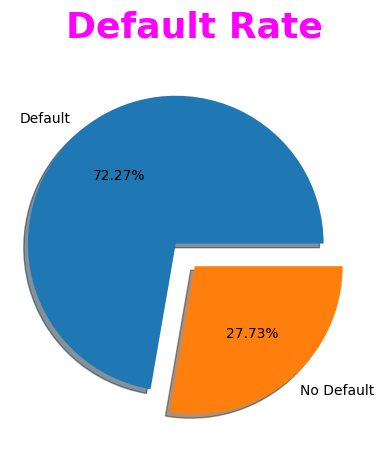

In [31]:
values=df1.Default.value_counts().values
labels=['Default','No Default']
explode=(0.2,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
plt.title('Default Rate',pad=32,fontsize=26,fontweight='bold',color='fuchsia')
plt.show()

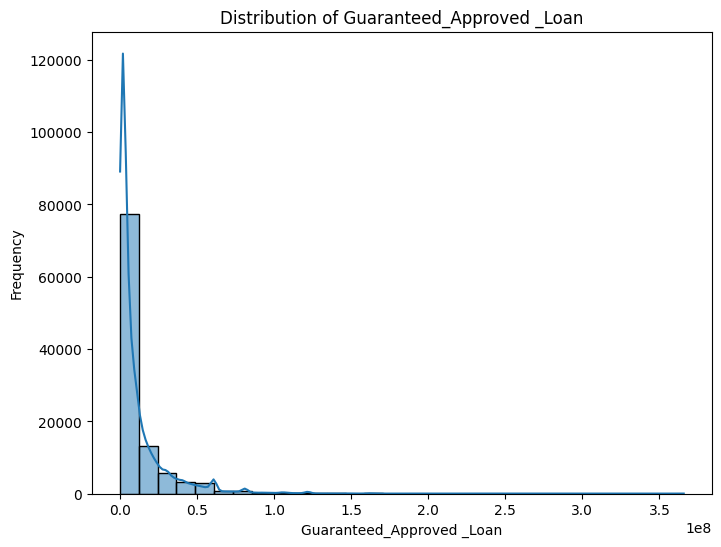

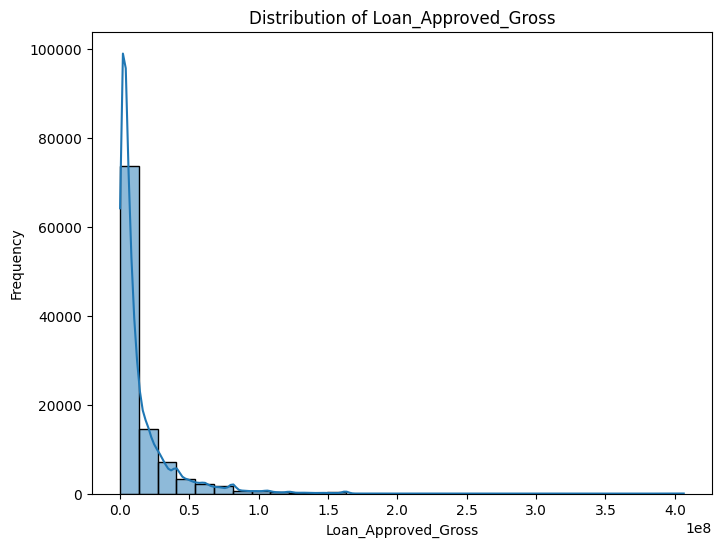

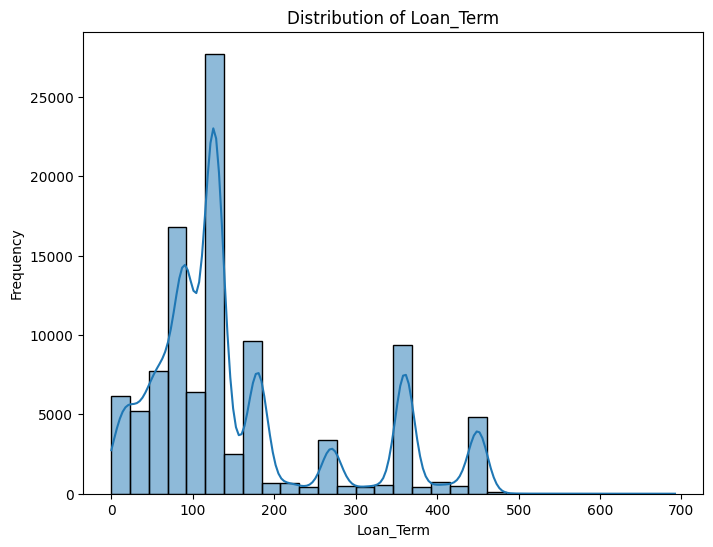

In [32]:
numeric_cols=['Guaranteed_Approved _Loan','Loan_Approved_Gross','Loan_Term']
for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df1[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()    #These histograms display the distributions of individual numeric columns.We can observe skewness,central tendency, potential outliers.

***Bivariate Analysis***

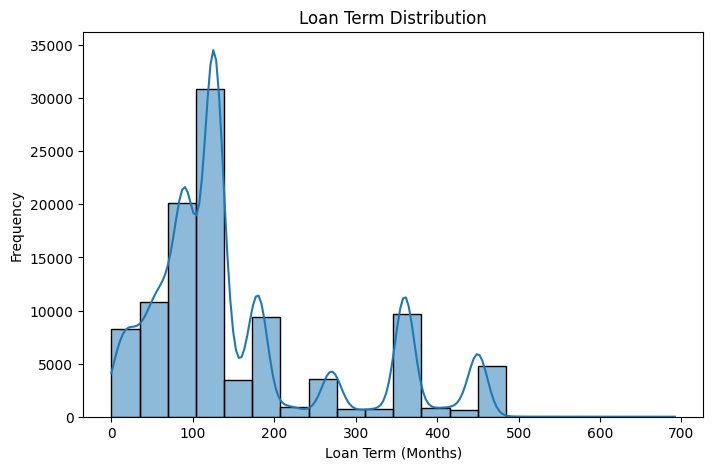

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df1["Loan_Term"],bins=20,kde=True)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.show()

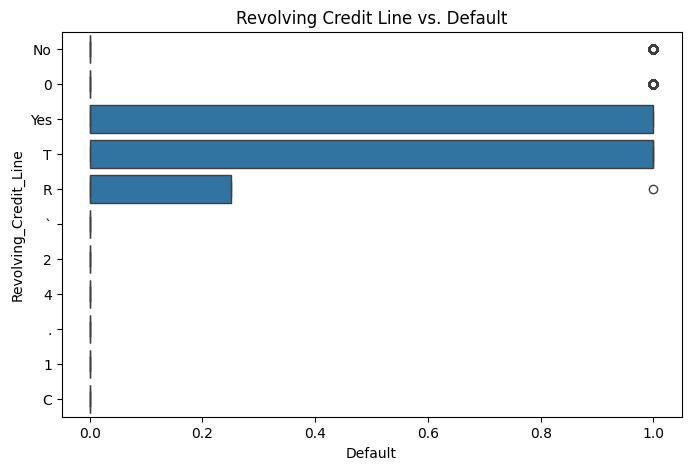

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Default',y='Revolving_Credit_Line',data=df1)
plt.title('Revolving Credit Line vs. Default')
plt.show()

***Multivariate Analysis***

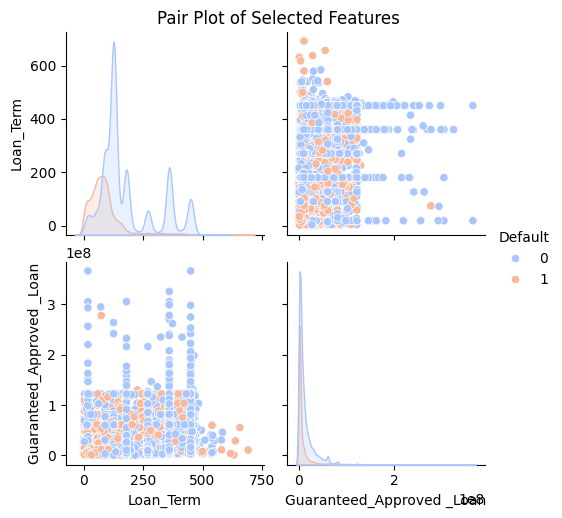

In [35]:
sel_col=["Loan_Term","Default","Guaranteed_Approved _Loan"]
sns.pairplot(df1[sel_col],hue="Default",diag_kind="kde",palette="coolwarm")
plt.suptitle('Pair Plot of Selected Features',y=1.02)
plt.show() #The pair plot shows pairwise relationships between multiple numeric features, colored by the default status.It helps identify interactions between variables.

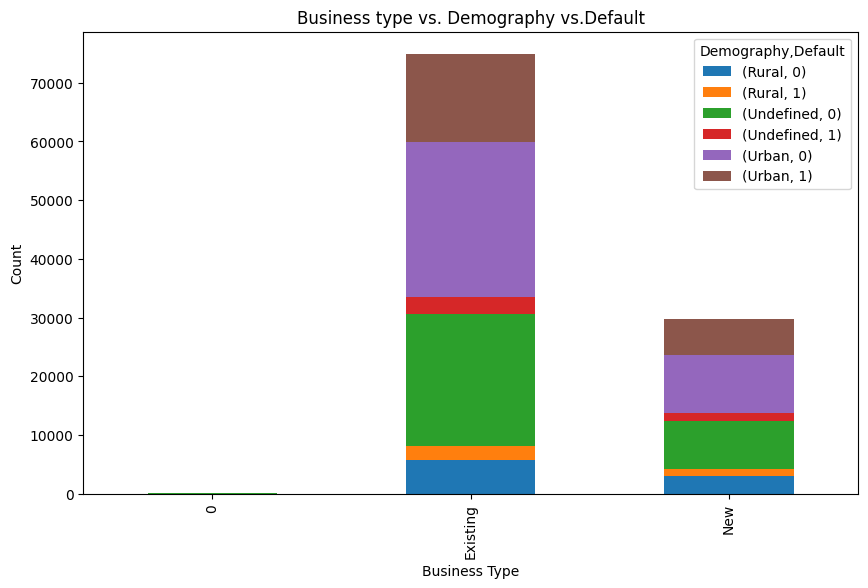

In [36]:
business_demography_default=pd.crosstab(df1['Business'],[df1['Demography'],df1['Default']])
business_demography_default.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Business type vs. Demography vs.Default')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.show() #This Stacked bar plot displays the relationship between business type,demography,and default status, providing insights into how these categorical variables interact.

***Handling Outliers***

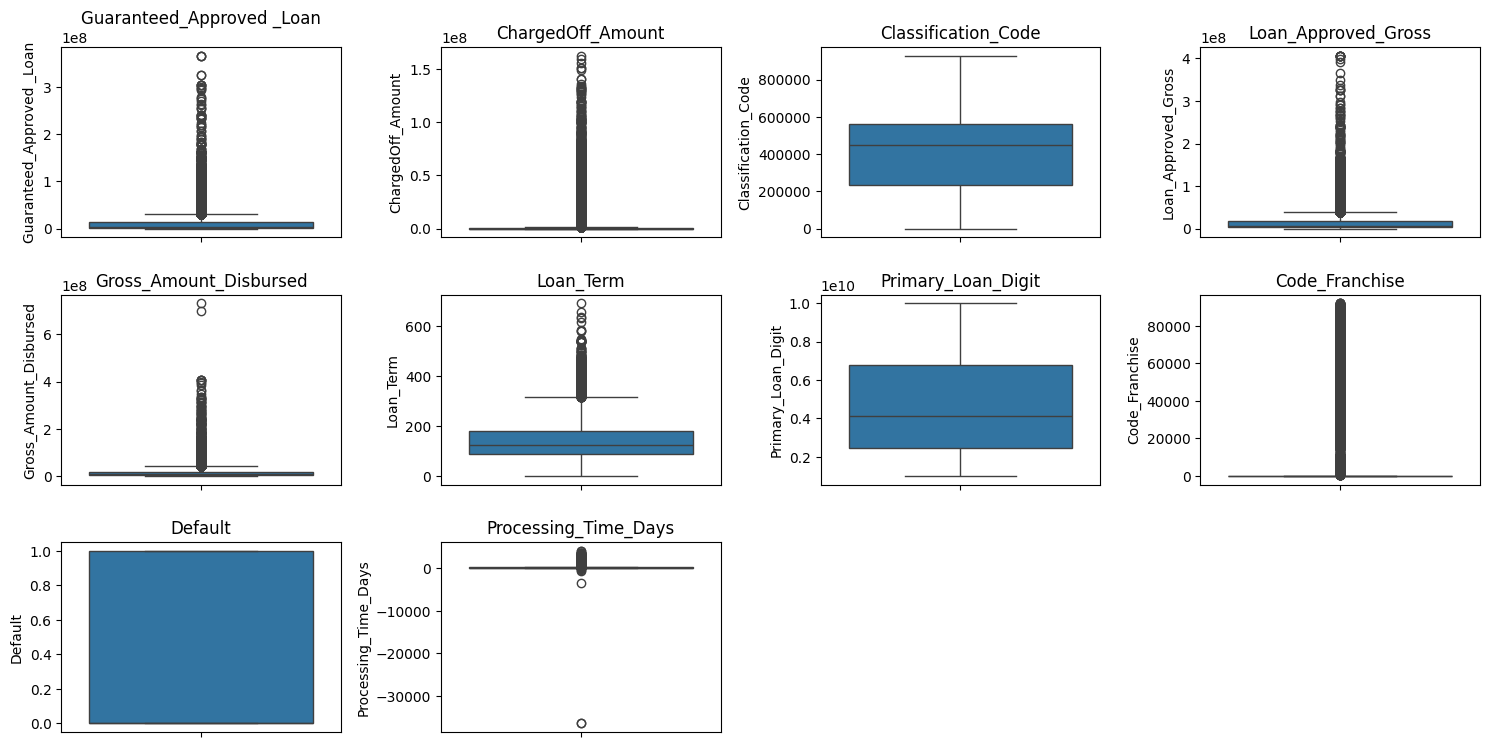

In [37]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df1[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [38]:
for col in numerical_cols:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df1[col]=np.where(df1[col]<lower_bound,lower_bound,np.where(df1[col]>upper_bound,upper_bound,df1[col]))

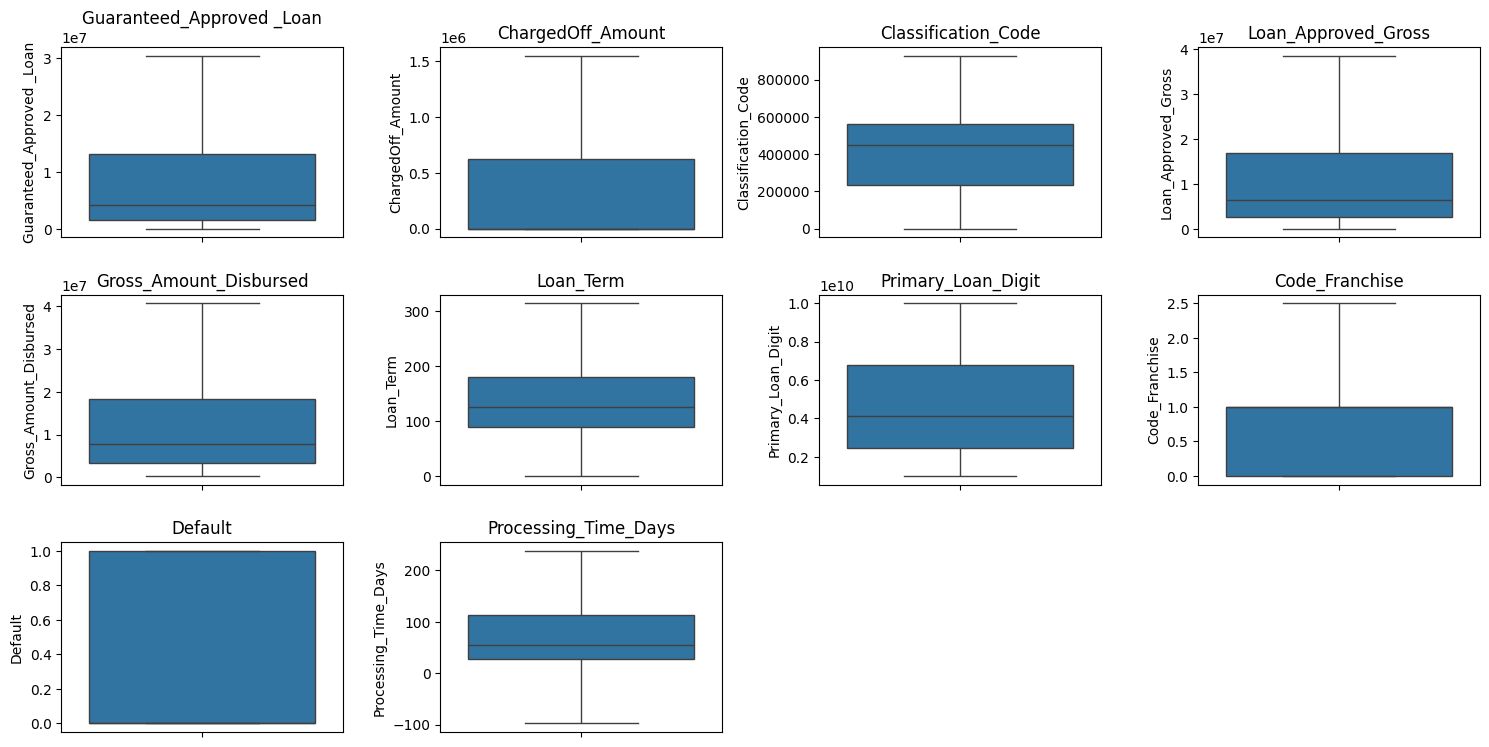

In [39]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df1[column])
    plt.title(column)
plt.tight_layout()
plt.show()

***Visualization After Handling Outliers****

***Univariate Analysis***

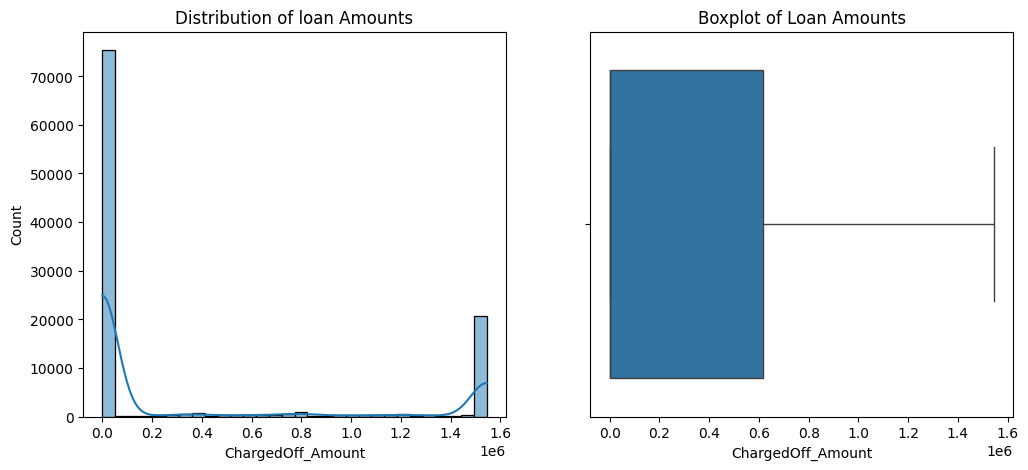

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df1['ChargedOff_Amount'],bins=30,kde=True)
plt.title("Distribution of loan Amounts")
plt.subplot(1,2,2)
sns.boxplot(x=df1["ChargedOff_Amount"])
plt.title("Boxplot of Loan Amounts")
plt.show()

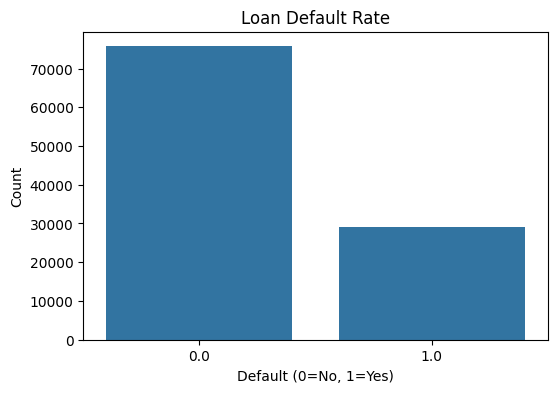

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x=df1["Default"])
plt.title("Loan Default Rate")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


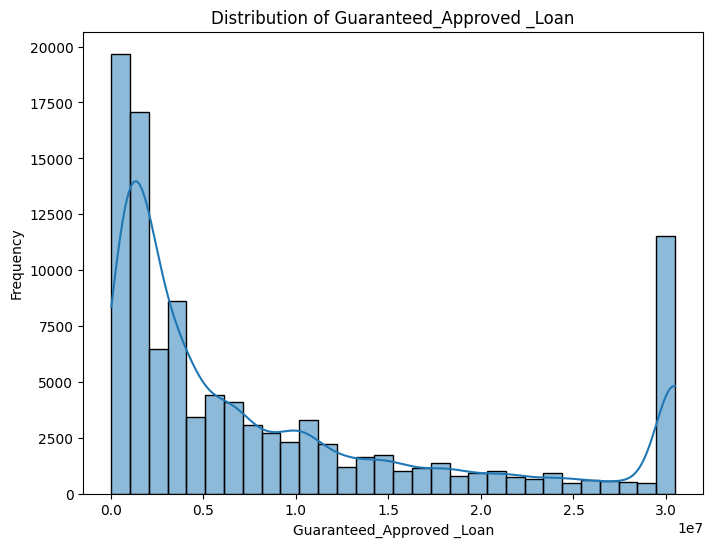

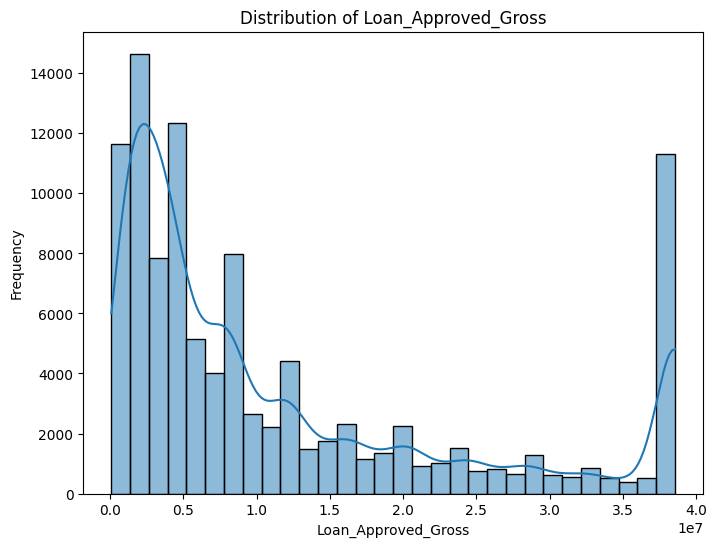

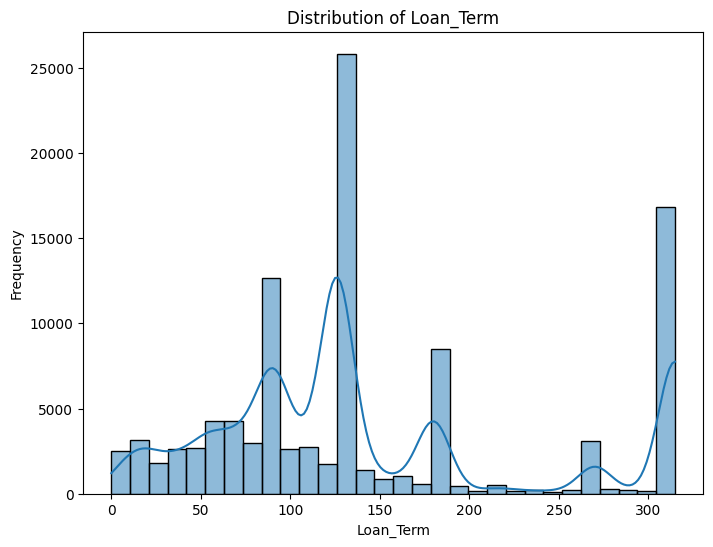

In [42]:
numeric_cols=['Guaranteed_Approved _Loan','Loan_Approved_Gross','Loan_Term']
for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df1[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()    #These histograms display the distributions of individual numeric columns.We can observe skewness,central tendency, potential outliers.

***Bivariate Analysis***

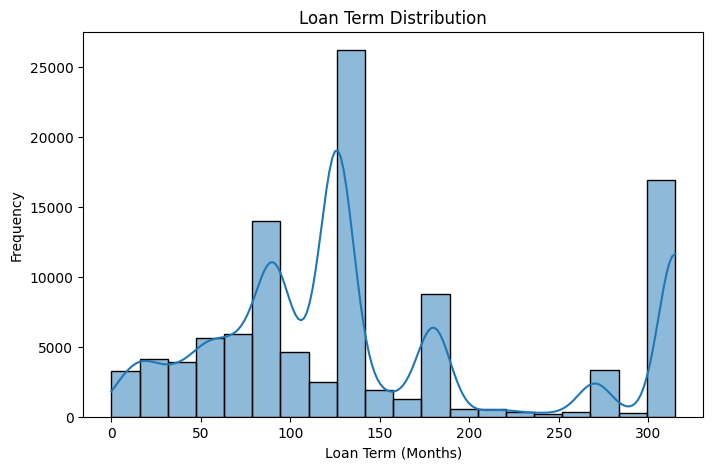

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df1["Loan_Term"],bins=20,kde=True)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Frequency")
plt.show()

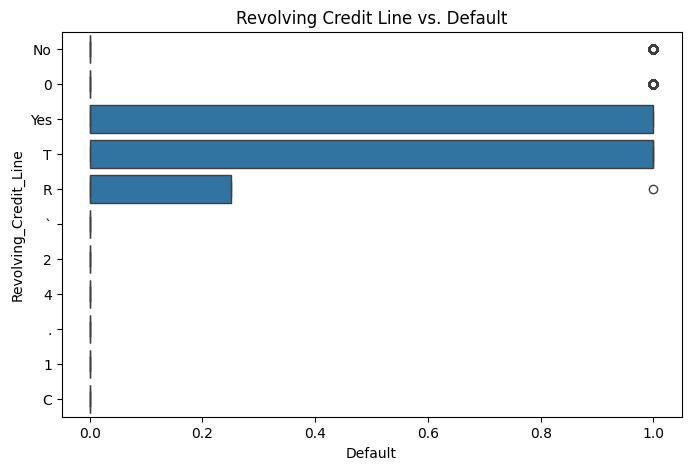

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Default',y='Revolving_Credit_Line',data=df1)
plt.title('Revolving Credit Line vs. Default')
plt.show()

***Multivariate Analysis***

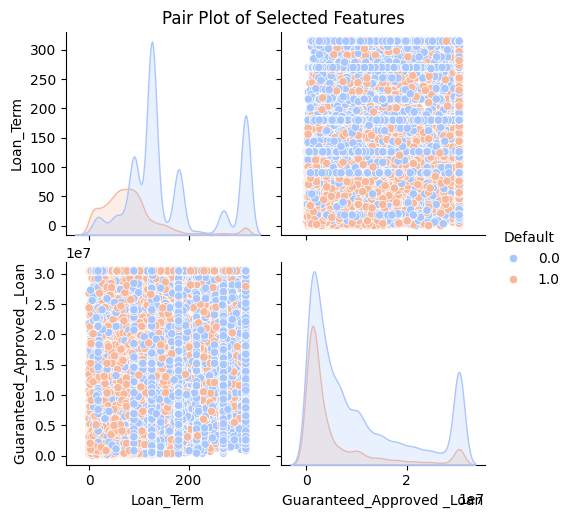

In [45]:
sel_col=["Loan_Term","Default","Guaranteed_Approved _Loan"]
sns.pairplot(df1[sel_col],hue="Default",diag_kind="kde",palette="coolwarm")
plt.suptitle('Pair Plot of Selected Features',y=1.02)
plt.show() #The pair plot shows pairwise relationships between multiple numeric features, colored by the default status.It helps identify interactions between variables.

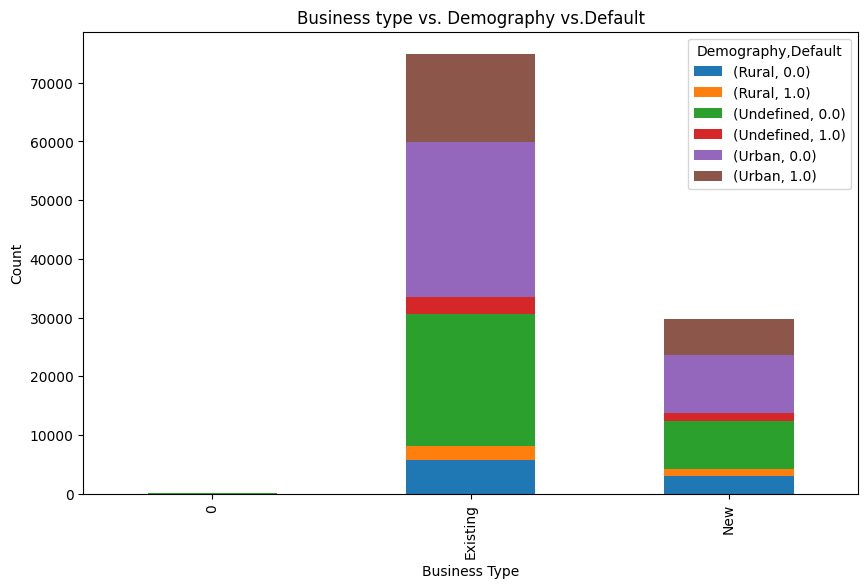

In [46]:
business_demography_default=pd.crosstab(df1['Business'],[df1['Demography'],df1['Default']])
business_demography_default.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Business type vs. Demography vs.Default')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.show() #This Stacked bar plot displays the relationship between business type,demography,and default status, providing insights into how these categorical variables interact.

***Encoding***

***Label Encoding***

In [47]:
label_encoder=LabelEncoder()

In [48]:
df1['Low_Documentation_Loan']=label_encoder.fit_transform(df1['Low_Documentation_Loan'])

In [49]:
df1['Revolving_Credit_Line']=label_encoder.fit_transform(df1['Revolving_Credit_Line'])

In [50]:
df1['Business']=label_encoder.fit_transform(df1['Business'])

In [51]:
df1['Demography']=label_encoder.fit_transform(df1['Demography'])

***Target  Encoding***

In [52]:
df1['State_Of_Bank']=df1.groupby('State_Of_Bank')['Default'].transform('mean')

In [53]:
df1['Name_Of_Bank']=df1.groupby('Name_Of_Bank')['Default'].transform('mean')

***HeatMap***

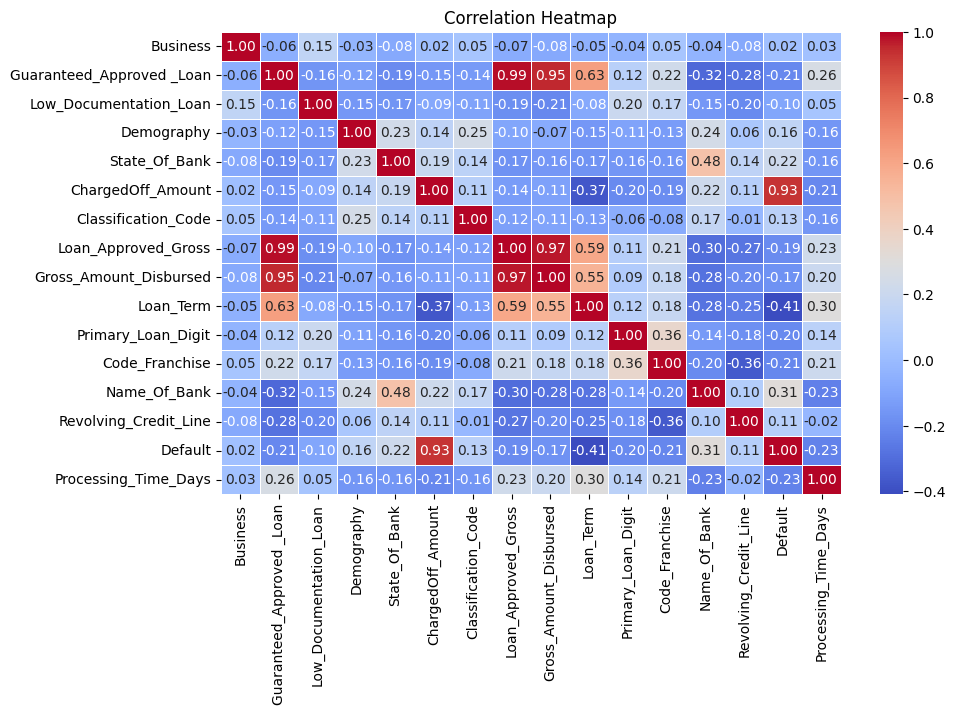

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()  #The correlation heatmap shows the pairwise correlations between numeric columns and the target variable.It helps identify potential predictors and multicollinearity.

***Detecting and Handling Skewness***

In [55]:
df1["Low_Documentation_Loan"]=np.cbrt(df1["Low_Documentation_Loan"])

In [56]:
df1["Guaranteed_Approved _Loan"]=np.cbrt(df1["Guaranteed_Approved _Loan"])

In [57]:
df1["Loan_Approved_Gross"]=np.cbrt(df1["Loan_Approved_Gross"])

In [58]:
df1["Gross_Amount_Disbursed"]=np.cbrt(df1["Gross_Amount_Disbursed"])

In [124]:
df1["ChargedOff_Amount"]=np.cbrt(df1["ChargedOff_Amount"])

In [60]:
df1["Processing_Time_Days"]=np.cbrt(df1["Processing_Time_Days"])

In [125]:
df1.skew()

Business                     0.932783
Guaranteed_Approved _Loan    0.408754
Low_Documentation_Loan      -0.491301
Demography                  -0.810388
State_Of_Bank                0.358196
ChargedOff_Amount            0.988699
Classification_Code         -0.296025
Loan_Approved_Gross          0.401741
Gross_Amount_Disbursed       0.356826
Loan_Term                    0.767481
Primary_Loan_Digit           0.429021
Code_Franchise               0.581244
Name_Of_Bank                 0.993863
Revolving_Credit_Line       -0.414501
Default                      0.995175
Processing_Time_Days        -0.155925
dtype: float64

***Separating Target and Features***

In [62]:
y=df1[['Default']]

In [63]:
x=df1.drop("Default",axis=1)

In [64]:
x=x.drop("Loan_Approved_Gross",axis=1)

In [65]:
x=x.drop("Gross_Amount_Disbursed",axis=1)

In [66]:
x=x.drop("Low_Documentation_Loan",axis=1)

In [67]:
x=x.drop("Processing_Time_Days",axis=1)

***Feature Scaling***

In [68]:
scaler=MinMaxScaler()

In [69]:
x_scaled=scaler.fit_transform(x)

***Train Test Split***

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

***VIF***

In [71]:
vif=pd.DataFrame()

In [72]:
vif['vif_values']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [73]:
vif['features']=x.columns

In [74]:
vif

,vif_values,features
0,6.876792,Business
1,8.059924,Guaranteed_Approved _Loan
2,5.634251,Demography
3,5.478742,State_Of_Bank
4,1.791961,ChargedOff_Amount
5,3.651600,Classification_Code
6,6.472476,Loan_Term
7,3.423149,Primary_Loan_Digit
8,3.691113,Code_Franchise
9,5.227150,Name_Of_Bank


***Logistic Regression***

In [75]:
ln=LogisticRegression()

In [76]:
ln.fit(x_scaled,y)

LogisticRegression()

In [77]:
yln_pred=ln.predict(x_test)

In [78]:
yln_train_pred=ln.predict(x_train)

***Testing Accuracy***

In [79]:
accuracyln=accuracy_score(y_test,yln_pred)

In [80]:
accuracyln

0.9921241050119332

***Training Accuracy***

In [81]:
accuracylnt=accuracy_score(y_train,yln_train_pred)

In [82]:
accuracylnt

0.9923508353221957

***Classification Report***|

In [83]:
classification=classification_report(y_test,yln_pred)

In [84]:
classification

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      0.99     15129\n         1.0       0.98      0.99      0.99      5821\n\n    accuracy                           0.99     20950\n   macro avg       0.99      0.99      0.99     20950\nweighted avg       0.99      0.99      0.99     20950\n'

In [85]:
from sklearn.metrics import confusion_matrix

***Confusion Matrix***

In [86]:
confusion_matrix(y_test,yln_pred)

array([[15033,    96],
       [   69,  5752]])

***KNN***

In [87]:
kn=KNeighborsClassifier()

In [88]:
kn.fit(x_scaled,y)

KNeighborsClassifier()

In [89]:
yk_pred=kn.predict(x_test)

***Testing Accuracy***

In [90]:
accuracyknn=accuracy_score(y_test,yk_pred)

In [91]:
accuracyknn

0.9937470167064439

In [92]:
yk_train_pred=ln.predict(x_train)

***Training Accuracy***

In [93]:
accuracyknnt=accuracy_score(y_train,yk_train_pred)

In [94]:
accuracyknnt

0.9923508353221957

***Confusion Matrix***

In [95]:
confusion_matrixknn=confusion_matrix(y_test,yk_pred)

In [96]:
confusion_matrixknn

array([[15030,    99],
       [   32,  5789]])

***Classification Report***

In [97]:
classificationknn=classification_report(y_test,yk_pred)

In [98]:
classificationknn

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00     15129\n         1.0       0.98      0.99      0.99      5821\n\n    accuracy                           0.99     20950\n   macro avg       0.99      0.99      0.99     20950\nweighted avg       0.99      0.99      0.99     20950\n'

***Decision Tree***

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
dt=DecisionTreeClassifier(max_depth=5,random_state=42)

In [101]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [102]:
ydt_pred=dt.predict(x_test)

***Testing Accuracy***

In [103]:
dt_accuracy=accuracy_score(y_test,ydt_pred)

In [104]:
dt_accuracy

0.9940334128878282

In [105]:
ydtt_pred=dt.predict(x_train)

***Training Accuracy***

In [106]:
dtt_accuracy=accuracy_score(y_train,ydtt_pred)

In [107]:
dtt_accuracy

0.9943556085918854

***Confusion Matrix***

In [108]:
confusion_matrixdt=confusion_matrix(y_test,ydt_pred)

In [109]:
confusion_matrixdt

array([[15026,   103],
       [   22,  5799]])

***Classification Report***

In [110]:
classificationdt=classification_report(y_test,ydt_pred)

In [111]:
classificationdt

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00     15129\n         1.0       0.98      1.00      0.99      5821\n\n    accuracy                           0.99     20950\n   macro avg       0.99      0.99      0.99     20950\nweighted avg       0.99      0.99      0.99     20950\n'

***Random Forest***

In [112]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [114]:
y_pred_rf=rf.predict(x_test)

***Testing Accuracy***

In [115]:
rf_accuracy=accuracy_score(y_test,y_pred_rf)

In [116]:
rf_accuracy

0.9941766109785203

In [117]:
yt_pred_rf=rf.predict(x_train)

***Training Accuracy***

In [118]:
rft_accuracy=accuracy_score(y_train,yt_pred_rf)

In [119]:
rft_accuracy

0.9940334128878282

***Confusion Matrix***

In [120]:
confusion_matrixrf=confusion_matrix(y_test,y_pred_rf)

In [121]:
confusion_matrixrf

array([[15027,   102],
       [   20,  5801]])

***Classification Report***

In [122]:
classificationrf=classification_report(y_test,y_pred_rf)

In [123]:
classificationrf

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00     15129\n         1.0       0.98      1.00      0.99      5821\n\n    accuracy                           0.99     20950\n   macro avg       0.99      0.99      0.99     20950\nweighted avg       0.99      0.99      0.99     20950\n'